In [1]:
%cd ..

d:\github\ripple_heterogeneity\python


In [2]:
import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os

import functions

import nelpy as nel  # main nelpy imports
import nelpy.plotting as npl  # optional plotting import

import math
import seaborn as sns
from tqdm import tqdm


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


# List of animals to use 

In [3]:
animal = ['AB1','AB3','AB4','AYA4','AYA6','AYA7','AYA9','AYA10',
    'OML5','OML3','OML7','OML8','OML10','OML18','OML19',
    'Wmaze2\OR15','Wmaze2\OR18','Wmaze3\OR22','Wmaze3\OR21','Wmaze3\OR23',
    'GrosmarkAD\Cicero','GrosmarkAD\Buddy','GrosmarkAD\Achilles','GrosmarkAD\Gatsby',
    'Kenji']

dataDir1 = 'A:/Data/'
dataDir2 = 'A:/OptoMECLEC/'
dataDir3 = 'A:/ORproject/'

# Load in data from cell_metrics

In [5]:
df = pd.DataFrame()
for a in tqdm(animal):
    print(a)

    if 'OML' in a:
        base_path = dataDir2
    elif 'Wmaze' in a:
        base_path = dataDir3
    else:
        base_path = dataDir1

    files = glob.glob(base_path+a+'/**/*.cell_metrics.cellinfo.mat',recursive=True)

    for f in files:
        print(f)
        basepath, _ = os.path.split(f)
        basepath = os.path.normpath(basepath)
        basename = os.path.basename(basepath)
        if (
            os.path.exists(os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat')) &
                os.path.exists(os.path.join(basepath,basename+'.SWRunitMetrics.mat'))
         ):
            # get cell_metrics
            df1,_ = functions.load_cell_metrics(os.path.join(basepath,basename+'.cell_metrics.cellinfo.mat'))
            # get SWRunitMetrics 
            df2 = functions.load_SWRunitMetrics(basepath)
            for _ in range(df2.epoch.nunique()-1):
                df1 = df1.append(df1,ignore_index=True)
            # print(df1.size())
            # print(df2.size())

            df_ = pd.concat([df1,df2], axis=1)

            df = df.append(df_,ignore_index=True)



  0%|          | 0/25 [00:00<?, ?it/s]

AB1
A:/Data/AB1\day1\day1.cell_metrics.cellinfo.mat


  4%|▍         | 1/25 [00:00<00:07,  3.20it/s]

A:/Data/AB1\day1 - Farnaz\day1.cell_metrics.cellinfo.mat
AB3
A:/Data/AB3\AB3_38_41\AB3_38_41.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_42_46\AB3_42_46.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_47_49\AB3_47_49.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_50_51\AB3_50_51.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_55_57\AB3_55_57.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_58_59\AB3_58_59.cell_metrics.cellinfo.mat
A:/Data/AB3\AB3_60\AB3_60.cell_metrics.cellinfo.mat


  8%|▊         | 2/25 [00:03<00:43,  1.90s/it]

AB4
A:/Data/AB4\day03\day03.cell_metrics.cellinfo.mat
A:/Data/AB4\day07\day07.cell_metrics.cellinfo.mat
A:/Data/AB4\day08\day08.cell_metrics.cellinfo.mat
A:/Data/AB4\day09\day09.cell_metrics.cellinfo.mat
A:/Data/AB4\day11\day11.cell_metrics.cellinfo.mat


 12%|█▏        | 3/25 [00:06<00:50,  2.31s/it]

AYA4
A:/Data/AYA4\day150726\day150726.cell_metrics.cellinfo.mat
A:/Data/AYA4\day150728\day150728.cell_metrics.cellinfo.mat


 16%|█▌        | 4/25 [00:07<00:36,  1.76s/it]

A:/Data/AYA4\day150804\day150804.cell_metrics.cellinfo.mat
AYA6
A:/Data/AYA6\day17\day17.cell_metrics.cellinfo.mat
A:/Data/AYA6\day19\day19.cell_metrics.cellinfo.mat
A:/Data/AYA6\day20\day20.cell_metrics.cellinfo.mat


 20%|██        | 5/25 [00:08<00:30,  1.52s/it]

AYA7
A:/Data/AYA7\day19\day19.cell_metrics.cellinfo.mat
A:/Data/AYA7\day20\day20.cell_metrics.cellinfo.mat
A:/Data/AYA7\day22\day22.cell_metrics.cellinfo.mat
A:/Data/AYA7\day24\day24.cell_metrics.cellinfo.mat
A:/Data/AYA7\day25\day25.cell_metrics.cellinfo.mat
A:/Data/AYA7\day27\day27.cell_metrics.cellinfo.mat
A:/Data/AYA7\day30\day30.cell_metrics.cellinfo.mat


 24%|██▍       | 6/25 [00:11<00:40,  2.15s/it]

AYA9


In [58]:
import scipy.io as sio

basepath = r'A:/Data/AB3/AB3_50_51'
filename = glob.glob(os.path.join(basepath,'*.SWRunitMetrics.mat'))
data = sio.loadmat(filename[0])


# df2 = pd.DataFrame()
# for epoch in data['SWRunitMetrics'].dtype.names:
#     print(epoch)
    # df2 = df2.append(extract_swr_epoch_data(data,epoch),ignore_index=True)
if data['SWRunitMetrics']['pre'][0][0].size>0:
    print('not empty')
else:
    print('empty')


# df2 = functions.load_SWRunitMetrics(basepath)
# df2

not empty


    #   dtype=[('particip', 'O'), ('nCellsEvent', 'O'), ('FReach', 'O'), ('FRall', 'O'), 
    ('FRparticip', 'O'), ('nSpkEach', 'O'), ('nSpkAll', 'O'), ('nSpkParticip', 'O'), ('nSpkEvent', 'O'), ('FRevent', 'O')])

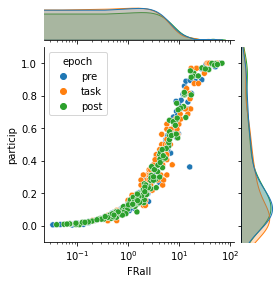

In [6]:
g = sns.jointplot(x="FRall",
                    y="particip",
                    hue="epoch",
                    data=df2,
                    ylim=(-0.1, 1.1),
                    height=4,
                    alpha=1)
ax = g.ax_joint
ax.set_xscale('log')
g.ax_marg_x.set_xscale('log')